In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_raw_corrupt = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid.nc')
age_data_raw_uncorrupt = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")
age_model_40 = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

In [3]:
H_data = H_data_40["H"].data
age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert"].data
age_c_uncert_real_data = age_data_40["age_c_uncert_unbounded"].data
age_c_model = age_model_40["age_c"].data

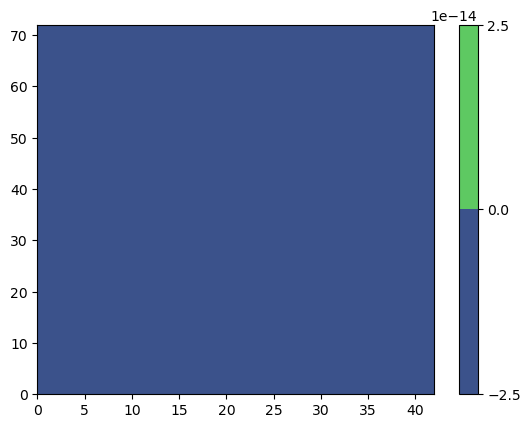

In [4]:
plt.contourf(age_c_model[-1]*(H_data >= 2000))
plt.colorbar()

In [5]:
# Cannot use 1500, have to use 2000 for masking. This should make it obvious why.
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 1500.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([1.76341480e+03, 1.69320051e+03, 1.59493575e+03, 1.49874863e+03,
        1.40914906e+03, 1.32720341e+03, 1.25134431e+03, 1.17973690e+03,
        1.10985614e+03, 1.03854095e+03, 9.41148735e+02, 8.45922448e+02,
        7.55119708e+02, 6.67027496e+02, 5.81279750e+02, 5.00269228e+02,
        4.28032836e+02, 3.61331033e+02, 3.00171589e+02, 2.51192466e+02,
        2.12892342e+02, 1.83425481e+02, 1.61343190e+02, 1.43874598e+02,
        1.26530374e+02, 1.13262522e+02, 1.02398289e+02, 9.44919770e+01,
        8.93211763e+01, 9.09428575e+01, 8.23175073e+01, 7.66962038e+01,
        7.43331458e+01, 7.61287176e+01, 7.43548591e+01, 7.45915809e+01,
        7.72640890e+01, 8.34918634e+01, 8.55927028e+01, 8.73175480e+01,
        9.09592728e+01, 9.73570934e+01, 9.90652960e+01, 1.01858481e+02,
        1.06268495e+02, 1.10389772e+02, 1.12672446e+02, 1.16275314e+02,
        1.20600802e+02, 1.22712728e+02, 1.25817074e+02, 1.29406697e+02,
        1.31893632e+02, 1.35347549e+02, 1.38804971e+02, 1.419850

In [6]:
# Cannot use 1500, have to use 2000 for masking. This should make it obvious why.
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 1500.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([1.74295962e+03, 1.67376386e+03, 1.57565547e+03, 1.48202750e+03,
        1.39499798e+03, 1.31477415e+03, 1.24066470e+03, 1.17060811e+03,
        1.10198250e+03, 1.03142353e+03, 9.34646250e+02, 8.39658313e+02,
        7.48948581e+02, 6.60547263e+02, 5.74060635e+02, 4.92179825e+02,
        4.18271489e+02, 3.49502779e+02, 2.87421531e+02, 2.37337204e+02,
        1.97578960e+02, 1.66568205e+02, 1.42885813e+02, 1.24395924e+02,
        1.06807177e+02, 9.23351985e+01, 8.10739205e+01, 7.32686330e+01,
        6.78187750e+01, 6.81693012e+01, 6.14487033e+01, 5.69941685e+01,
        5.59841835e+01, 5.95240525e+01, 5.86183118e+01, 5.97123351e+01,
        6.37572629e+01, 7.16133459e+01, 7.46824395e+01, 7.78300593e+01,
        8.31182055e+01, 9.13349488e+01, 9.45242214e+01, 9.90846268e+01,
        1.05566055e+02, 1.10389772e+02, 1.12672446e+02, 1.16275314e+02,
        1.20600802e+02, 1.22712728e+02, 1.25817074e+02, 1.29406697e+02,
        1.31893632e+02, 1.35347549e+02, 1.38804971e+02, 1.419850

In [7]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([874.29857229, 850.79830423, 808.84491902, 765.30622293,
        722.63679681, 685.32323969, 653.0085551 , 624.97777504,
        600.49405018, 577.62336842, 547.34994569, 512.55304177,
        472.04748223, 425.45543062, 374.51752851, 323.26192734,
        275.47439887, 230.16931271, 189.0699546 , 155.84691835,
        129.45646799, 108.78559601,  92.84295623,  80.23988082,
         68.03941976,  57.97521496,  49.88342219,  43.61337632,
         38.71594939,  40.92799261,  35.56009217,  31.25107874,
         28.93744139,  29.39093475,  27.03538196,  25.67746276,
         25.64439411,  27.3522377 ,  27.10157408,  27.0152337 ,
         27.9284401 ,  29.70477444,  30.09430532,  31.13711797,
         33.0039917 ,  33.476686  ,  32.7025962 ,  32.31384725,
         32.1830919 ,  31.41730994,  30.86583884,  30.4209006 ,
         29.70931616,  29.10433076,  28.54630964,  27.98243521,
         27.46020472,  26.90797899,  26.35639649,  25.89124296,
         25.55442433,  25.28832464,  25.

In [8]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio = mask*age_c_data/age_c_uncert_data
field = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_data**2

np.sum(field, axis = (1,2)), np.sum(field), np.max(mask*age_c_data/age_c_uncert_data)

(array([889.13351663, 864.915318  , 823.18184556, 777.0937506 ,
        733.21008194, 694.59699839, 660.94982079, 631.80136596,
        606.43480751, 583.04131071, 552.38973925, 517.47333262,
        476.85052067, 430.61570439, 380.39357721, 329.89053123,
        283.62991616, 239.78857876, 199.39882772, 167.13366914,
        141.98028028, 122.52683338, 107.99855069,  96.24837307,
         84.60128094,  75.61007179,  67.80200499,  61.7973582 ,
         57.07875491,  60.43942619,  53.54941033,  48.44740075,
         45.16303329,  44.20299406,  41.230505  ,  39.26509265,
         38.34856465,  38.80969966,  37.70374503,  36.34330697,
         35.60847336,  35.72691907,  34.63538001,  33.91097245,
         33.70643184,  33.476686  ,  32.7025962 ,  32.31384725,
         32.1830919 ,  31.41730994,  30.86583884,  30.4209006 ,
         29.70931616,  29.10433076,  28.54630964,  27.98243521,
         27.46020472,  26.90797899,  26.35639649,  25.89124296,
         25.55442433,  25.28832464,  25.

In [9]:
np.sum(mask)

31661.0

In [10]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_real_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio_real = mask*age_c_data/age_c_uncert_real_data
field_real = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_real_data**2

np.sum(field_real, axis = (1,2)), np.sum(field_real), np.max(mask*age_c_data/age_c_uncert_real_data)

(array([415537.69247163, 406513.14877766, 387851.08581441, 367810.12995735,
        348232.19304073, 330889.71637227, 315475.76316977, 301702.06050585,
        289148.74196188, 276786.35781702, 263166.80245554, 246938.39681105,
        227247.58755973, 204108.87765482, 178620.54900486, 152838.08566507,
        128694.35825338, 107235.31044112,  88918.166331  ,  73861.73461526,
         61680.13183674,  51894.31307856,  44029.97098153,  37660.41543228,
         32304.80248359,  27842.16193437,  24216.90706294,  21337.68071196,
         19058.23724058,  19587.75125214,  16599.02618648,  14166.62101354,
         12589.96704533,  12149.53802183,  10818.50950192,   9933.67324198,
          9622.25099761,   9937.65579893,   9695.34967581,   9565.07165888,
          9858.38750831,  10465.97213658,  10611.05743516,  11107.82490838,
         11932.30206181,  12329.4520877 ,  12222.09919752,  12361.87986264,
         12654.28108042,  12326.0420651 ,  12144.00331291,  12013.96020823,
         116

In [11]:
mask = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_real_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 2000.0:
                mask[kc, j, i] = 1.0

ratio_real = mask*age_c_data/age_c_uncert_real_data
field_real = mask*0.5*(age_c_data-age_c_model)**2/age_c_uncert_real_data**2

np.sum(field_real, axis = (1,2)), np.sum(field_real), np.max(mask*age_c_data/age_c_uncert_real_data)

(array([420409.66050307, 411226.62982893, 392538.63321851, 371579.95916217,
        351625.94761514, 333848.68090832, 317982.52420202, 303793.01662255,
        290926.16947609, 278363.55099826, 264642.49160022, 248332.27687848,
        228620.04866825, 205579.62375478, 180321.20050685, 154771.15704418,
        131035.72759694, 110092.0485282 ,  91973.17337491,  77283.50126775,
         65517.2144964 ,  56051.25668301,  48641.38478239,  42615.58750993,
         37424.66701022,  33299.49539602,  29776.91966854,  27048.89724561,
         24972.91214829,  25974.62619975,  22337.35300407,  19620.37195426,
         17772.21191686,  16890.86917663,  15363.53737676,  14323.83857956,
         13749.21238504,  13693.83536736,  13161.3090143 ,  12607.14551499,
         12320.94957835,  12364.38650947,  12078.94015993,  11979.20087661,
         12153.06427022,  12329.4520877 ,  12222.09919752,  12361.87986264,
         12654.28108042,  12326.0420651 ,  12144.00331291,  12013.96020823,
         116

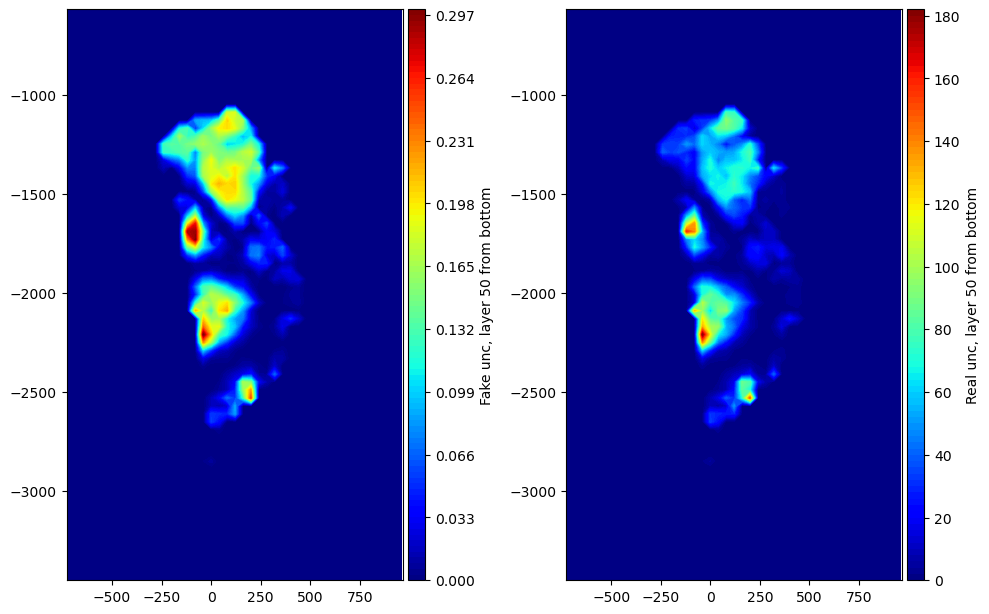

In [12]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[49],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 50 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[49],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 50 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()

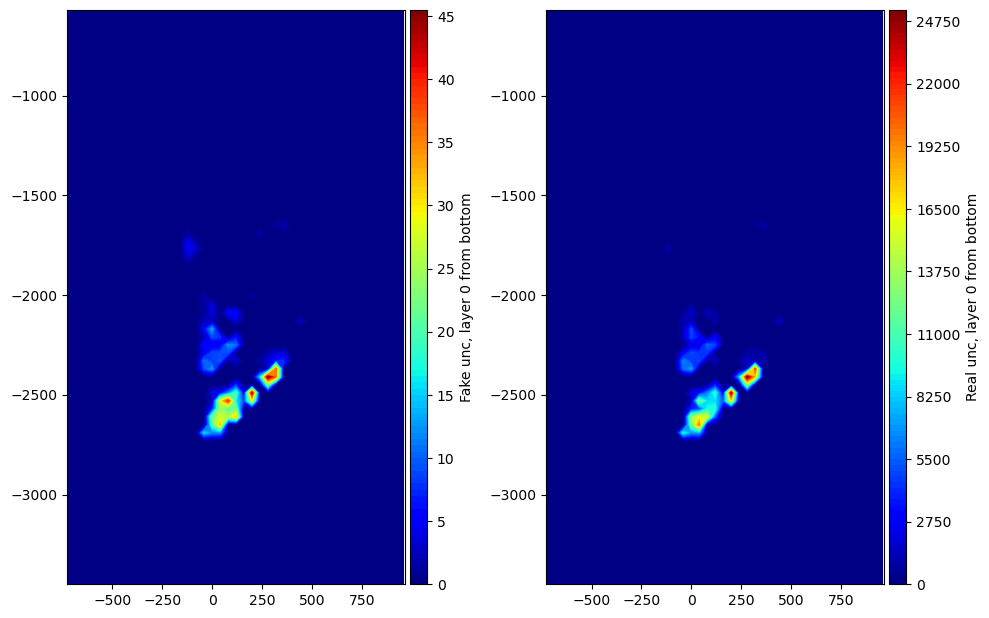

In [13]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[0],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 0 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[0],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 0 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()

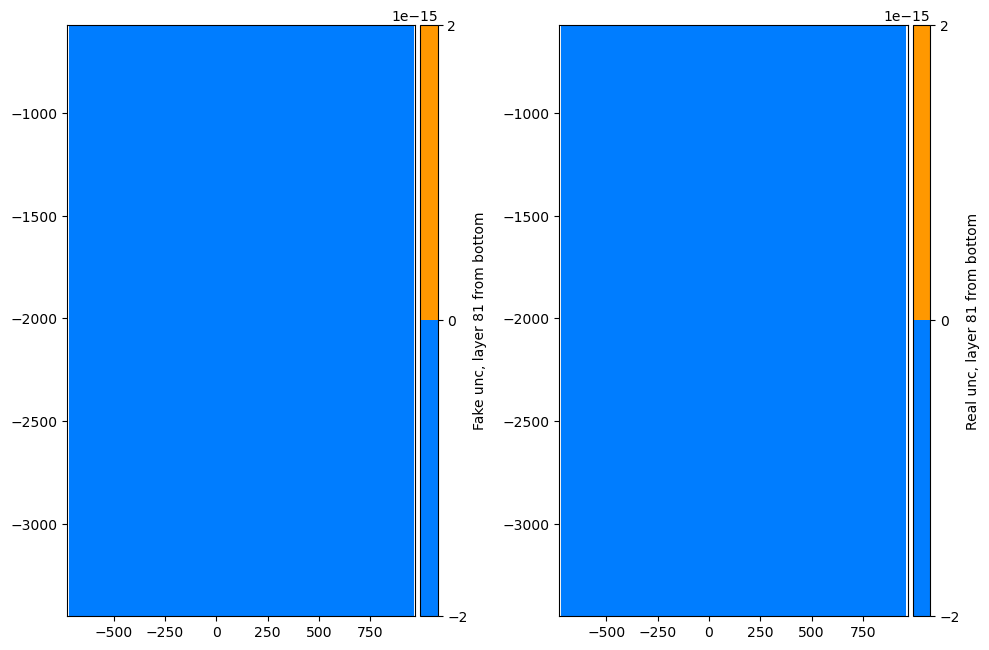

In [14]:
n_rows, n_cols = 1, 2
aspect_ratio = len(age_model_40['x'])/len(age_model_40['y'])
subplot_width = 5
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = (n_cols*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field[-1],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[0], cbar_label='Fake unc, layer 81 from bottom')
fancyPlotter.plot_normal(age_model_40['x']/1000.0, age_model_40['y']/1000.0, 
                         field_real[-1],
                         cmap = 'jet', nbins = 100, fig=fig, ax=ax[1], cbar_label='Real unc, layer 81 from bottom')

# A DIFFERENT WAY OF MAYBE DOING THIS RIGHT
ax[0].set_aspect(1)
ax[1].set_aspect(1)
plt.tight_layout()